In [1]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
 
service = QiskitRuntimeService(channel="ibm_quantum", token="00c8a231ee3b886c2bb185fd6e689eb7a37d29794cc4e7db68d6992fa68253b0598729b8610a0eb61c298b65386d810e9b568d6906f9199732617e2745d1bf75") # Insert your API token here.
backend = service.backend("ibm_kyiv") # I chose ibm_osaka as the backed, though there are many choices


In [5]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

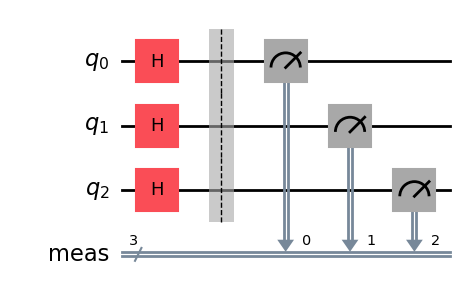

In [23]:
c = QuantumCircuit(3)
c.h(0)
c.h(1)
c.h(2)
# c.cx(0, 1)
c.measure_all()
c.draw("mpl")

{4: 0.119140625, 6: 0.1259765625, 1: 0.1357421875, 5: 0.1123046875, 7: 0.1337890625, 3: 0.12109375, 2: 0.1162109375, 0: 0.1357421875}


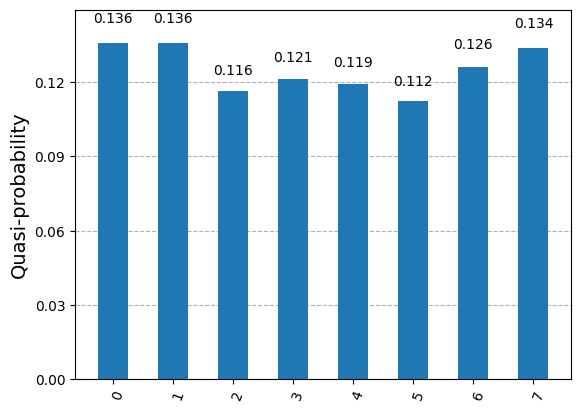

In [40]:
job = Sampler().run([c])

sim_result = job.result()
print(sim_result.quasi_dists[0])
plot_histogram(sim_result.quasi_dists[0])

In [93]:
import qiskit_ibm_runtime
qiskit_ibm_runtime.__version__

'0.30.0'

In [99]:
from qiskit_ibm_runtime import Sampler as IBMSampler
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService(channel="ibm_quantum", token="00c8a231ee3b886c2bb185fd6e689eb7a37d29794cc4e7db68d6992fa68253b0598729b8610a0eb61c298b65386d810e9b568d6906f9199732617e2745d1bf75") # Insert your API token here.
backend = service.least_busy(operational=True, simulator=False)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(c)

ibm_job = IBMSampler(backend).run([isa_circuit])
result = ibm_job.result()
 
 

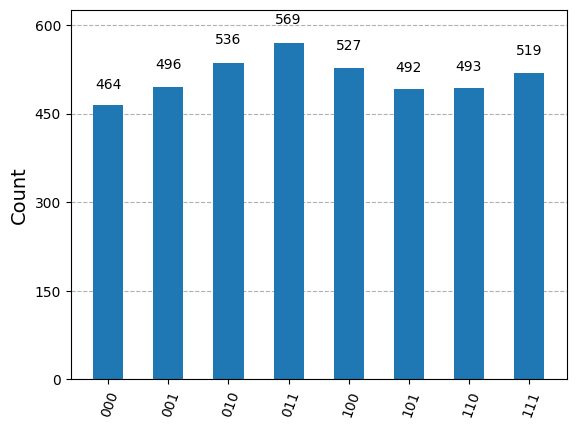

In [113]:
ibm_result = ibm_job.result()
plot_histogram(ibm_result[0].data["meas"].get_counts())